In [1]:
import pandas as pd
import pymc_marketing as pmm
import matplotlib as mpl
import matplotlib.pyplot as plt
from cabm import post_processing as ppr

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
# Figure setup
# Set the font to Courier
mpl.rcParams['font.family'] = 'Courier'

# Set the line weight to thin
mpl.rcParams['lines.linewidth'] = 0.75

# Set the color scheme to black and white
mpl.rcParams['text.color'] = 'black'
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['xtick.color'] = 'black'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['axes.edgecolor'] = 'black'

In [3]:
# def prepare_sales_data(file_path, params=None):
#     # Default parameters
#     default_params = {
#         'date_column': 'Date',
#         'step_column': 'Step',
#         'purchase_columns': ['price_A', 'tv_A', 'web_A', 'price_B', 'tv_B', 'web_B'],
#         'total_purchase_names': ['Total_Purchases_A', 'Total_Purchases_B'],
#         'sales_columns': ['Total_Purchases_A', 'Total_Purchases_B'],
#         'price_columns': ['price_A', 'price_B'],
#         'exclude_columns': ['Date', 'Step'],
#         'truncate_start': 52,
#         'scale_factor': 1000
#     }
    
#     # Update default parameters with any provided parameters
#     if params:
#         default_params.update(params)
    
#     # Load the data
#     agent_df = pd.read_pickle(file_path)
    
#     # Add date column
#     agent_df = ppr.add_date_column(agent_df)
    
#     # Calculate total purchases
#     data_A = ppr.calculate_total_purchases(
#         agent_df, 
#         default_params['purchase_columns'], 
#         default_params['total_purchase_names']
#     )
    
#     # Add total sales columns
#     data_A = ppr.add_total_sales_columns(
#         data_A, 
#         default_params['sales_columns'], 
#         default_params['price_columns']
#     )
    
#     # Ensure float columns
#     data_A = ppr.ensure_float_columns(data_A, exclude_columns=default_params['exclude_columns'])
    
#     # Truncate and reset index
#     data_a_mod = data_A[default_params['truncate_start']:].reset_index(drop=True)
    
#     # Scale total sales
#     for col in default_params['sales_columns']:
#         data_a_mod[col] = data_a_mod[col] * default_params['scale_factor']
    
#     return data_a_mod

In [4]:
# # Example usage
# params = {
#     'truncate_start': 52,
#     'scale_factor': 100
# }
# data_a_mod = prepare_sales_data('agent_output_ad_increment.pkl', params)

In [5]:
def prepare_sales_data(file_path, params=None):
    # Default parameters
    default_params = {
        'date_column': 'Date',
        'step_column': 'Step',
        'purchase_columns': ['price_A', 'tv_A', 'web_A', 'price_B', 'tv_B', 'web_B'],
        'total_purchase_names': ['Total_Purchases_A', 'Total_Purchases_B'],
        'sales_columns': ['Total_Purchases_A', 'Total_Purchases_B'],
        'price_columns': ['price_A', 'price_B'],
        'exclude_columns': ['Date', 'Step'],
        'truncate_start': 52,
        'scale_factor': 1000
    }
    
    # Update default parameters with any provided parameters
    if params:
        default_params.update(params)
    
    # Load the data
    agent_df = pd.read_pickle(file_path)
    
    # Add date column
    agent_df = ppr.add_date_column(agent_df)
    
    # Calculate total purchases
    data_A = ppr.calculate_total_purchases(
        agent_df, 
        default_params['purchase_columns'], 
        default_params['total_purchase_names']
    )
    
    # Add total sales columns
    data_A = ppr.add_total_sales_columns(
        data_A, 
        default_params['sales_columns'], 
        default_params['price_columns']
    )
    
    # Ensure float columns
    data_A = ppr.ensure_float_columns(data_A, exclude_columns=default_params['exclude_columns'])
    
    # Truncate and reset index
    data_a_mod = data_A[default_params['truncate_start']:].reset_index(drop=True)
    
    # Scale total sales
    for col in default_params['sales_columns']:
        data_a_mod[col] = data_a_mod[col] * default_params['scale_factor']
    
    return data_a_mod

def plot_simulation_outputs(file_paths, params=None):
    plt.figure(figsize=(10, 6))
    
    for file_path in file_paths:
        data_a_mod = prepare_sales_data(file_path, params)
        plt.plot(data_a_mod['Date'], data_a_mod['Total_Sales_A'], label=file_path)
    
    plt.xlabel('Date')
    plt.ylabel('Total Sales A')
    plt.title('Total Sales A vs Date')
    plt.legend()
    plt.show()

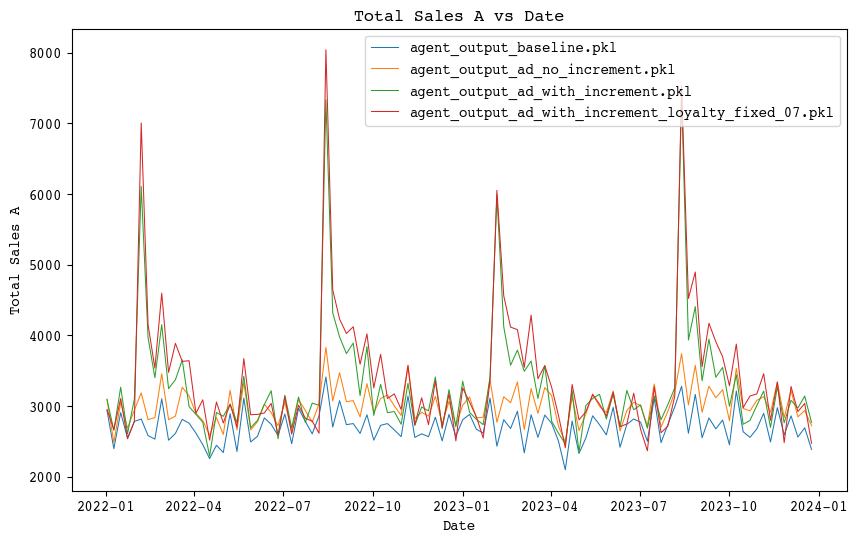

In [6]:
# Example usage
file_paths = [
    'agent_output_baseline.pkl',
    'agent_output_ad_no_increment.pkl',
    'agent_output_ad_with_increment.pkl',
    'agent_output_ad_with_increment_loyalty_fixed_07.pkl'
]
params = {
    'truncate_start': 52,
    'scale_factor': 100
}
plot_simulation_outputs(file_paths, params)

In [3]:
agent_df = pd.read_pickle('agent_output_ad_increment.pkl')

In [4]:
agent_df = ppr.add_date_column(agent_df)

In [5]:
data_A = ppr.calculate_total_purchases(agent_df, ['price_A','tv_A','web_A', 'price_B', 'tv_B', 'web_B'], ['Total_Purchases_A', 'Total_Purchases_B'])


In [6]:
data_A = ppr.add_total_sales_columns(data_A, ['Total_Purchases_A', 'Total_Purchases_B'],  ['price_A','price_B'],)

In [7]:
data_A = ppr.ensure_float_columns(data_A, exclude_columns=['Date','Step'])

In [8]:
data_A

,Date,Step,price_A,tv_A,web_A,price_B,tv_B,web_B,Total_Purchases_A,Total_Purchases_B,Total_Sales_A,Total_Sales_B
0,2021-01-03,0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-01-10,1,5.0,0.0,0.0,5.0,0.0,0.0,41.0,19.0,205.0,95.0
2,2021-01-17,2,5.0,0.0,0.0,5.0,0.0,0.0,229.0,116.0,1145.0,580.0
3,2021-01-24,3,5.0,0.0,0.0,5.0,0.0,0.0,402.0,199.0,2010.0,995.0
4,2021-01-31,4,5.0,375000.0,0.0,5.0,0.0,0.0,473.0,249.0,2365.0,1245.0
...,...,...,...,...,...,...,...,...,...,...,...,...
203,2024-11-24,203,5.0,0.0,0.0,5.0,0.0,0.0,532.0,119.0,2660.0,595.0
204,2024-12-01,204,5.0,0.0,0.0,5.0,0.0,0.0,683.0,212.0,3415.0,1060.0
205,2024-12-08,205,5.0,0.0,0.0,5.0,0.0,0.0,570.0,168.0,2850.0,840.0
206,2024-12-15,206,5.0,0.0,0.0,5.0,0.0,0.0,609.0,167.0,3045.0,835.0


In [9]:
data_a_mod = data_A[52:].reset_index(drop=True)

In [10]:
data_a_mod['Total_Sales_A'] = data_a_mod['Total_Sales_A'] * 1000
data_a_mod['Total_Sales_B'] = data_a_mod['Total_Sales_B'] * 1000

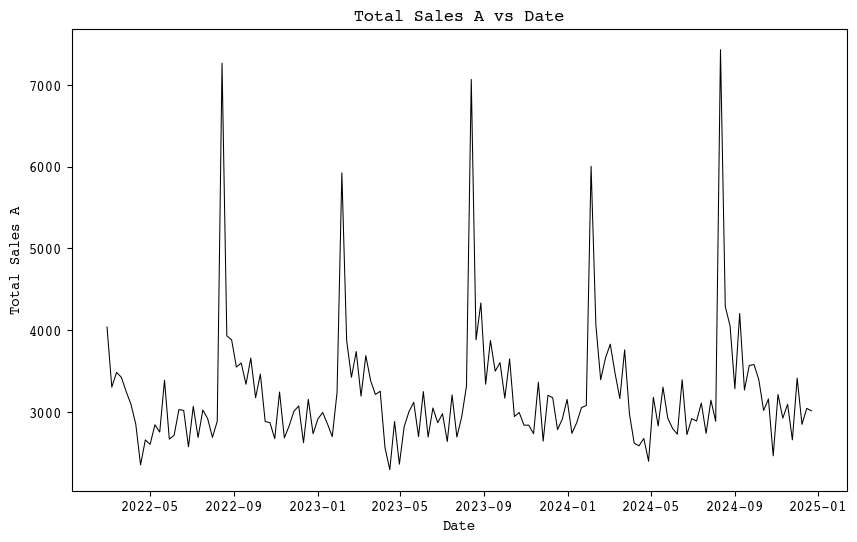

In [5]:
plt.figure(figsize=(10,6))
plt.plot(data_a_mod['Date'], data_a_mod['Total_Sales_A'],color='black')
plt.xlabel('Date')
plt.ylabel('Total Sales A')
plt.title('Total Sales A vs Date')
plt.show()


In [12]:
data_a_mod.to_csv("sim_data_trunc.csv", index=False)

In [13]:
# Define the columns
date_column = 'Date'
channel_columns = ['tv_A', 'web_A']
#control_columns = ['Total_Purchases_B']

my_sampler_config = {
    'tune': 1000,
    'draws': 1000,
    'chains': 4,
    #'target_accept': 0.9  # Increase this value to increase target_accept
}

# Instantiate the model
mmm = pmm.mmm.delayed_saturated_mmm.DelayedSaturatedMMM(
    sampler_config=my_sampler_config,
    date_column=date_column,
    channel_columns=channel_columns,
    #control_columns=control_columns,
    adstock_max_lag=8,
)

In [14]:
# Split data into predictors (X) and target (y)
X = data_a_mod.drop('Total_Purchases_A', axis=1)
y = data_a_mod['Total_Purchases_A']

# Fit the model
mmm.fit(X, y)

/Users/michael/.venvs/pymmm_0_6_0/lib/python3.12/site-packages/pymc/model/core.py:518: FutureWarning: All coords are now mutable by default. coords_mutable will be removed in a future release.
  warnings.warn(
/Users/michael/.venvs/pymmm_0_6_0/lib/python3.12/site-packages/pymc/model/core.py:988: FutureWarning: Coords are now always mutable. Specifying `mutable` will raise an error in a future release
  warnings.warn(
/Users/michael/.venvs/pymmm_0_6_0/lib/python3.12/site-packages/pymc/data.py:304: FutureWarning: MutableData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, beta_channel, alpha, lam, likelihood_sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


Inference data with groups:
	> posterior
	> sample_stats
	> observed_data
	> constant_data
	> fit_data

In [15]:
import arviz as az
import pymc as pm
import seaborn as sns

In [16]:
mmm.fit_result

<xarray.Dataset> Size: 35MB
Dimensions:                    (chain: 4, draw: 1000, channel: 2, date: 156)
Coordinates:
  * chain                      (chain) int64 32B 0 1 2 3
  * draw                       (draw) int64 8kB 0 1 2 3 4 ... 996 997 998 999
  * channel                    (channel) <U5 40B 'tv_A' 'web_A'
  * date                       (date) datetime64[ns] 1kB 2022-01-02 ... 2024-...
Data variables:
    alpha                      (chain, draw, channel) float64 64kB 0.439 ... ...
    beta_channel               (chain, draw, channel) float64 64kB 0.3308 ......
    channel_adstock            (chain, draw, date, channel) float64 10MB 0.0 ...
    channel_adstock_saturated  (chain, draw, date, channel) float64 10MB 0.0 ...
    channel_contributions      (chain, draw, date, channel) float64 10MB 0.0 ...
    intercept                  (chain, draw) float64 32kB 0.444 0.445 ... 0.4416
    lam                        (chain, draw, channel) float64 64kB 1.381 ... ...
    likelihood_sigma           (chain, draw) float64 32kB 0.08357 ... 0.0775
    mu                         (chain, draw, date) float64 5MB 0.444 ... 0.4416
Attributes:
    created_at:                 2024-10-25T01:09:52.251028+00:00
    arviz_version:              0.18.0
    inference_library:          pymc
    inference_library_version:  5.15.1
    sampling_time:              5.285780906677246
    tuning_steps:               1000

In [17]:
az.summary(
    data=mmm.fit_result,
    var_names=[
        "intercept",
        "likelihood_sigma",
        "beta_channel",
        "alpha",
        "lam",
    ],
)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
intercept,0.445,0.009,0.430,0.462,0.000,0.000,2864.0,2335.0,1.0
likelihood_sigma,0.084,0.005,0.075,0.094,0.000,0.000,2454.0,2022.0,1.0
beta_channel[tv_A],0.317,0.248,0.130,0.646,0.012,0.008,998.0,628.0,1.0
beta_channel[web_A],0.413,0.347,0.139,0.966,0.012,0.009,1088.0,908.0,1.0
alpha[tv_A],0.424,0.118,0.199,0.633,0.002,0.002,2473.0,1731.0,1.0
alpha[web_A],0.456,0.128,0.194,0.667,0.003,0.002,2397.0,1531.0,1.0
lam[tv_A],2.763,1.569,0.223,5.467,0.042,0.030,989.0,605.0,1.0
lam[web_A],2.126,1.251,0.192,4.307,0.033,0.023,1077.0,886.0,1.0


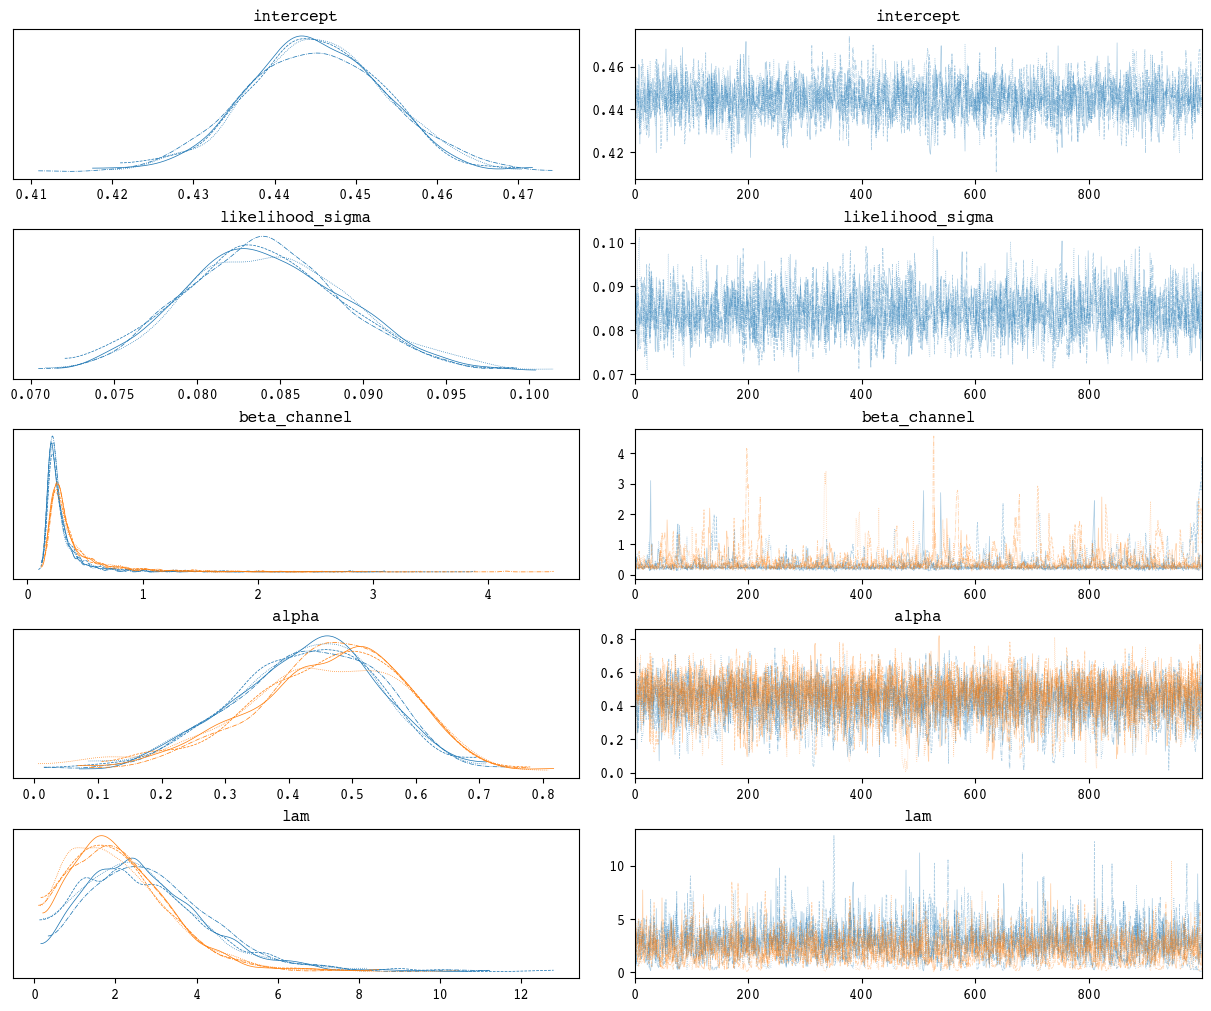

In [18]:
_ = az.plot_trace(
    data=mmm.fit_result,
    var_names=[
        "intercept",
        "likelihood_sigma",
        "beta_channel",
        "alpha",
        "lam",
    ],
    compact=True,
    backend_kwargs={"figsize": (12, 10), "layout": "constrained"},
)

In [19]:
mmm.sample_posterior_predictive(X, extend_idata=True, combined=True)

Sampling: [y]


Output()

<xarray.Dataset> Size: 5MB
Dimensions:  (date: 156, sample: 4000)
Coordinates:
  * date     (date) datetime64[ns] 1kB 2022-01-02 2022-01-09 ... 2024-12-22
  * sample   (sample) object 32kB MultiIndex
  * chain    (sample) int64 32kB 0 0 0 0 0 0 0 0 0 0 0 ... 3 3 3 3 3 3 3 3 3 3 3
  * draw     (sample) int64 32kB 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
Data variables:
    y        (date, sample) float64 5MB 545.5 696.1 482.0 ... 788.8 642.5 784.8
Attributes:
    created_at:                 2024-10-25T01:10:31.743532+00:00
    arviz_version:              0.18.0
    inference_library:          pymc
    inference_library_version:  5.15.1

/Users/michael/.venvs/pymmm_0_6_0/lib/python3.12/site-packages/sklearn/utils/deprecation.py:129: FutureWarning: Xt was renamed X in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/michael/.venvs/pymmm_0_6_0/lib/python3.12/site-packages/sklearn/utils/deprecation.py:129: FutureWarning: Xt was renamed X in version 1.5 and will be removed in 1.7.
  warnings.warn(


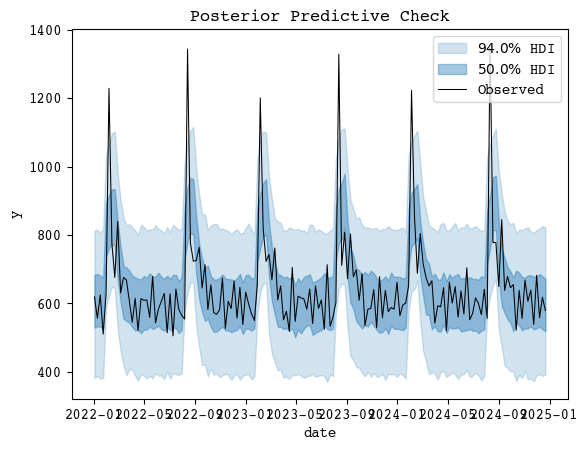

In [20]:
mmm.plot_posterior_predictive(original_scale=True);

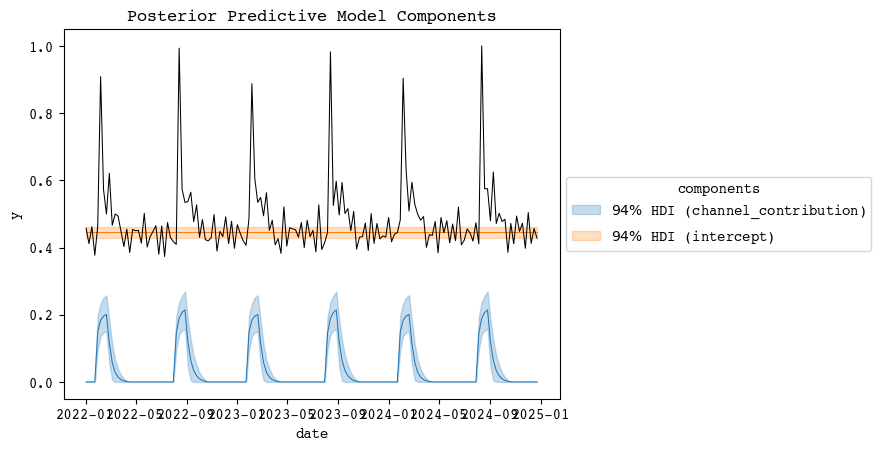

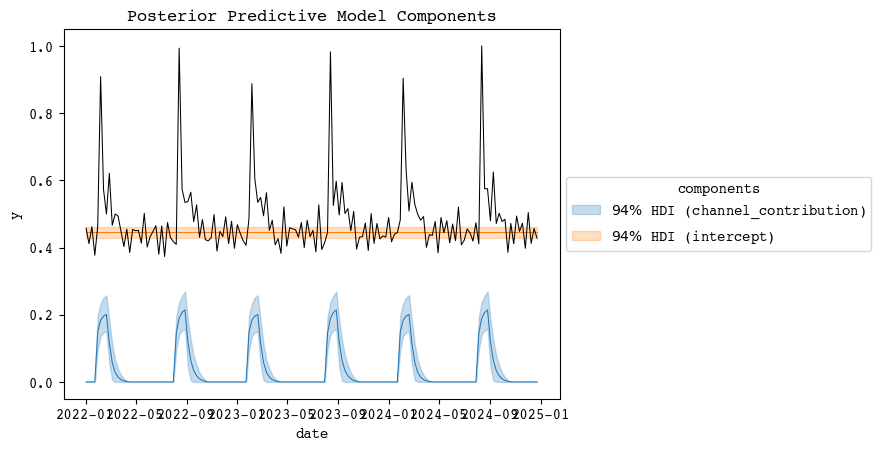

In [21]:
mmm.plot_components_contributions()

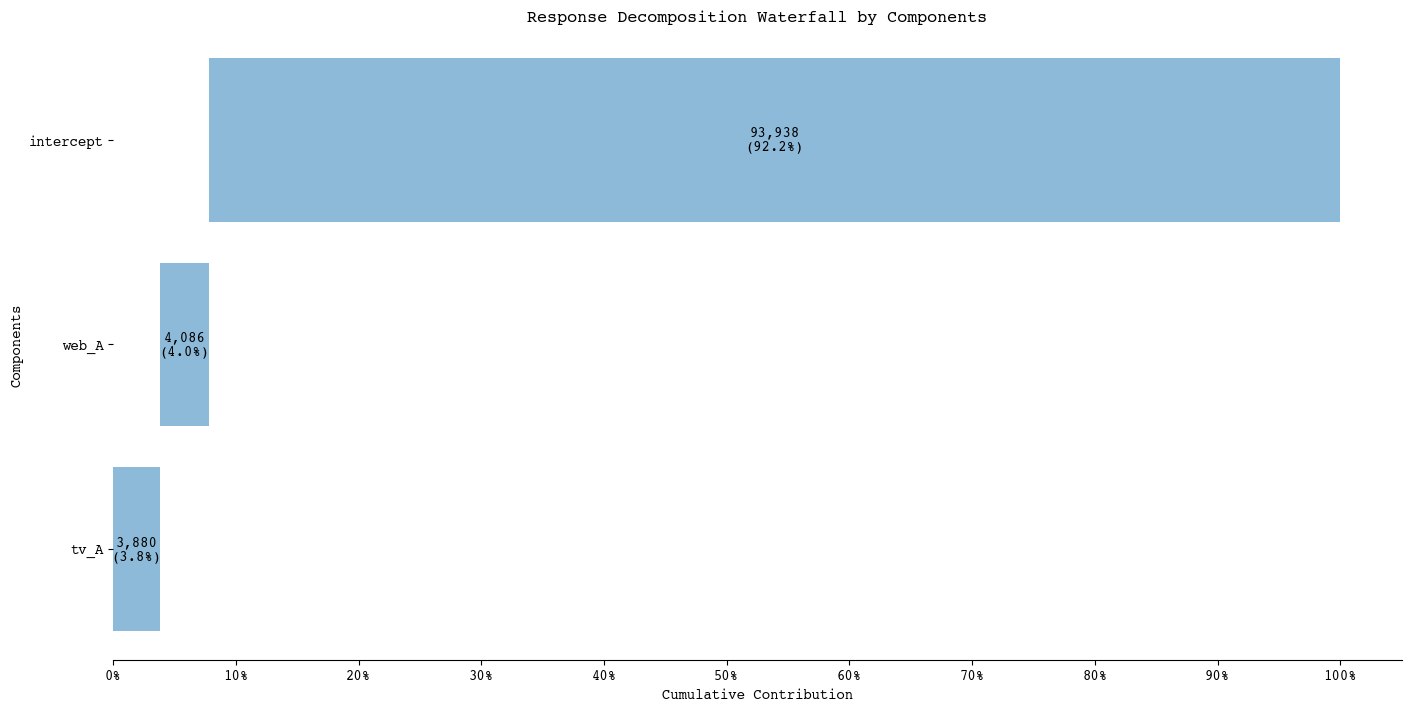

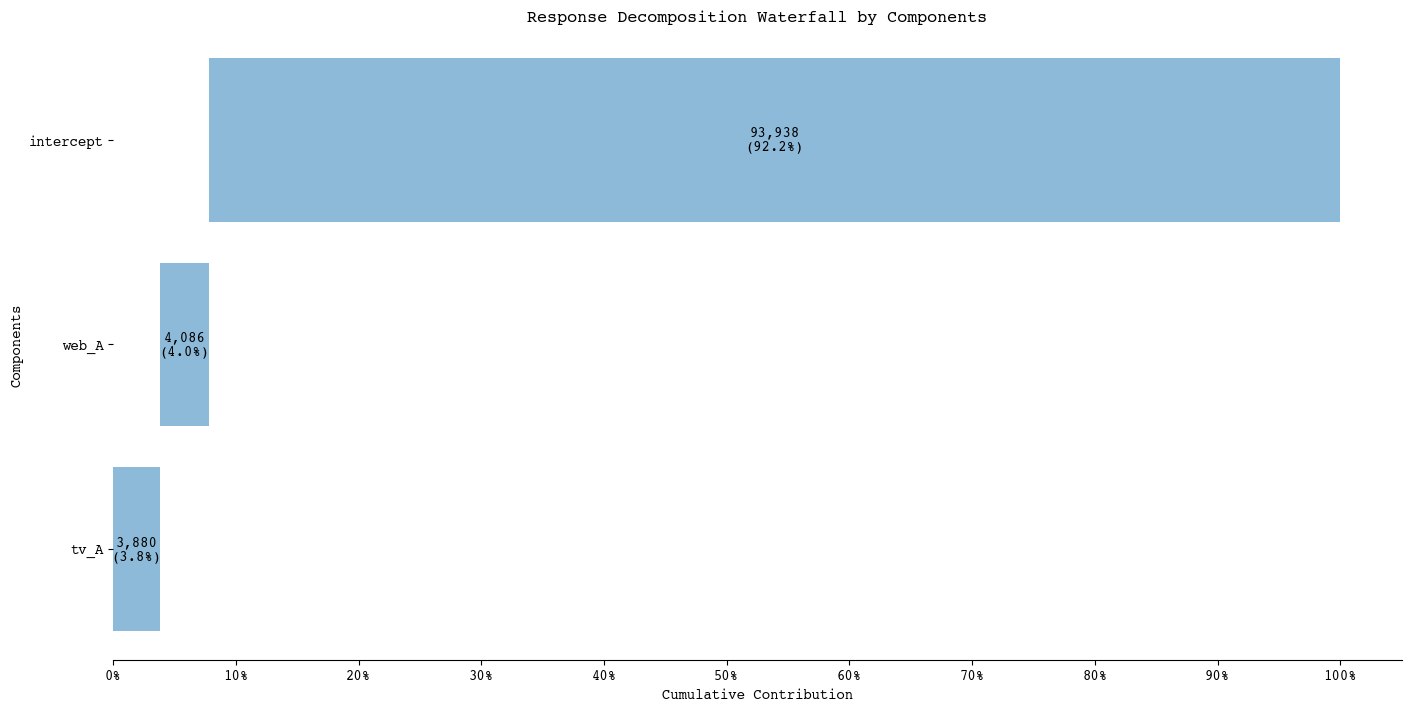

In [22]:
mmm.plot_waterfall_components_decomposition()

In [ ]:
import pprint

In [ ]:
dummy_model = DelayedSaturatedMMM(date_column="", channel_columns="", adstock_max_lag=4)
pprint.pprint(dummy_model.default_model_config)